# DSA
## Fundamentos de Linguagem Python Para Análise de Dados e Data Science
### Machine Learning com Scikit - Learn

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês ?

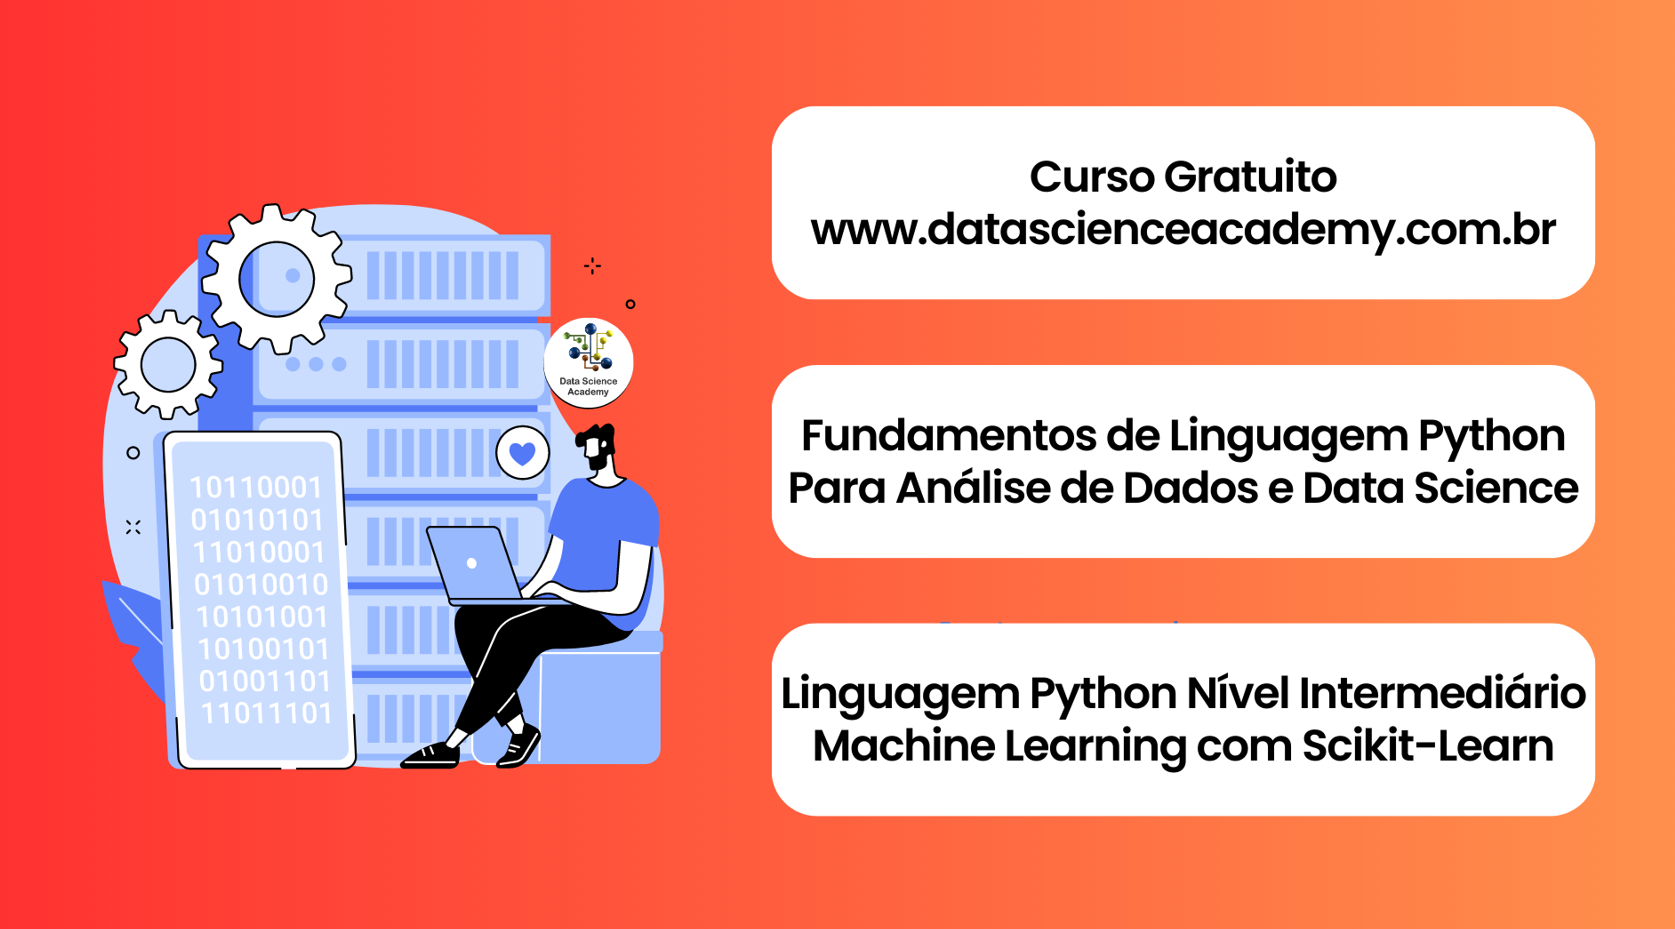

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook: ', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook:  3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregando os Dados

In [3]:
# Carregando o dataset
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(500, 2)

In [5]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
### Análise Exploratória - Resumo Estatístico
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [9]:
# Correlação 
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [10]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [12]:
# Resumo estatístico da varíavel preditora
df_dsa['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

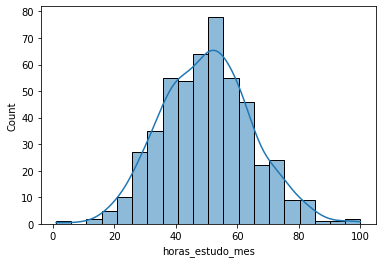

In [13]:
# Histograma da variável preditiva
sea.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True)

### Preparação dos Dados

In [14]:
# Prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [15]:
type(X)

numpy.ndarray

In [16]:
# Ajuste o shape de X
X = X.reshape(-1, 1)

In [17]:
# Prepara a variável alvo
y = df_dsa['salario']

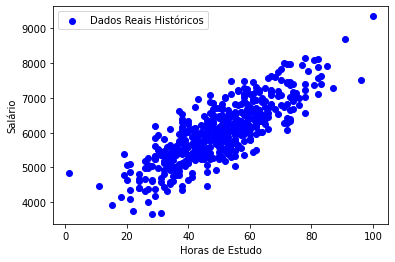

In [18]:
# Gráfic de dispersão entre X e Y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [19]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_treino.shape

(400, 1)

### Modelagem Preditiva (Machine Learning)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [22]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

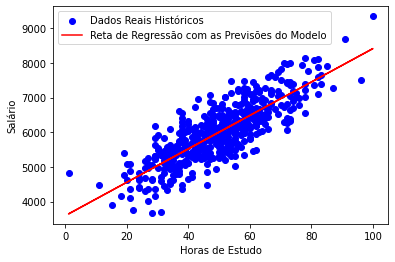

In [23]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = 'red', label = 'Reta de Regressão com as Previsões do Modelo')
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [24]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:2f}")

Coeficiente R^2: 0.593933


In [25]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.783724372753

Algoritmo de Regressão Linear:

In [26]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

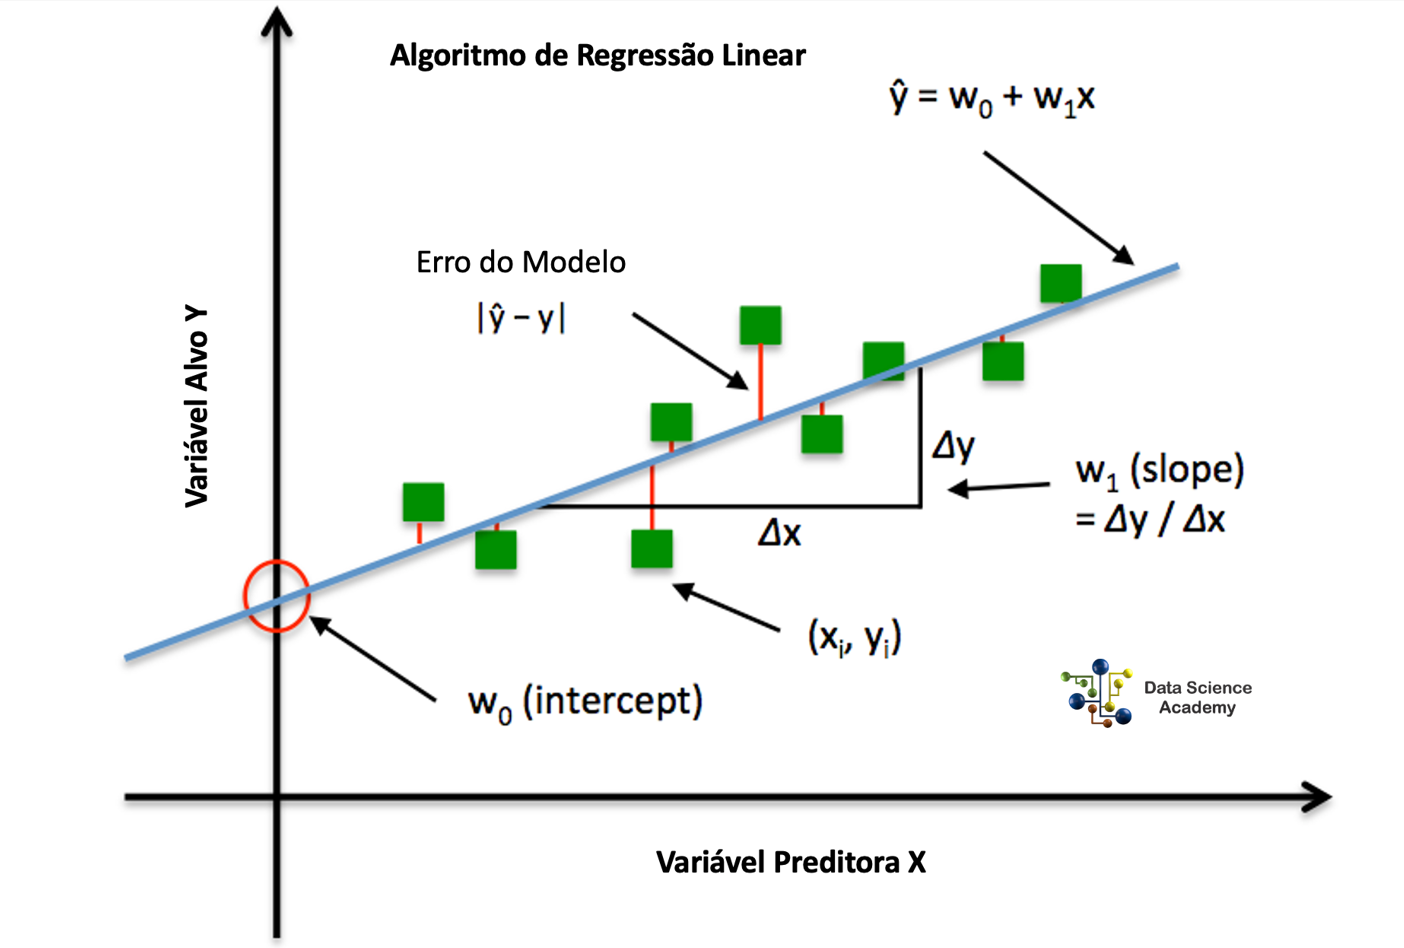

### Deploy do Modelo

Usaremos o modelo para prever o salário com base nas horas de estudo.

In [27]:
# Define um novo valor para horas com base de estudo
horas_estudo_novo = np.array([[48]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [28]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [29]:
# Define um novo valor para 
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [30]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
